In [132]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
OrangeDF = pd.read_csv("../OrangeQualityData.csv")

In [3]:
OrangeDF.head(5)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [4]:
OrangeDF.dtypes

Size (cm)             float64
Weight (g)              int64
Brix (Sweetness)      float64
pH (Acidity)          float64
Softness (1-5)        float64
HarvestTime (days)      int64
Ripeness (1-5)        float64
Color                  object
Variety                object
Blemishes (Y/N)        object
Quality (1-5)         float64
dtype: object

In [5]:
print(OrangeDF["Color"].apply(type).unique())
print(OrangeDF["Variety"].apply(type).unique())
print(OrangeDF["Blemishes (Y/N)"].apply(type).unique())
print(OrangeDF.isna().sum())

[<class 'str'>]
[<class 'str'>]
[<class 'str'>]
Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64


^No columns with mixed values and no missing values in dataset

In [6]:
print(OrangeDF["Variety"].value_counts(normalize=True))
print(OrangeDF["Variety"].value_counts(normalize=True).head(10).sum())

Variety
Cara Cara                0.087137
Temple                   0.074689
Star Ruby                0.074689
Navel                    0.066390
Moro (Blood)             0.066390
Tangerine                0.058091
Clementine               0.058091
Washington Navel         0.058091
Satsuma Mandarin         0.053942
Ortanique (Hybrid)       0.053942
Minneola (Hybrid)        0.049793
Jaffa                    0.045643
Ambiance                 0.045643
Valencia                 0.045643
California Valencia      0.029046
Honey Tangerine          0.029046
Hamlin                   0.020747
Midsweet (Hybrid)        0.020747
Clementine (Seedless)    0.016598
Murcott (Hybrid)         0.012448
Navel (Late Season)      0.012448
Blood Orange             0.008299
Navel (Early Season)     0.008299
Tangelo (Hybrid)         0.004149
Name: proportion, dtype: float64
0.6514522821576764


^top 10 orange types make up 65% of the data, with the other 14 making up the other 35%

In [7]:
OrangeDF["Blemishes (Y/N)"].value_counts(normalize=True)

Blemishes (Y/N)
N                          0.618257
Y (Sunburn Patch)          0.095436
Y (Scars)                  0.070539
Y (Minor)                  0.058091
Y (Mold Spot)              0.041494
Y (Bruising)               0.037344
Y (Split Skin)             0.033195
Y (Minor Insect Damage)    0.024896
Y (Sunburn)                0.008299
Y (Bruise)                 0.004149
N (Minor)                  0.004149
N (Split Skin)             0.004149
Name: proportion, dtype: float64


## **^^WE NEED TO DECIDE HOW TO REPRESENT ABOVE: EITHER 1s & 0s, SCALE FROM 0-1, OR DUMMY ENCODING FOR EACH TYPE OF BLEMISH (PROBABLY NOT SINCE WE DONT WANT TOO HIGH DIMENSIONS)**

In [8]:
OrangeDF.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


No extreme outliers and fairly normally distributed data for most columns as shown below

array([[<Axes: title={'center': 'Size (cm)'}>,
        <Axes: title={'center': 'Weight (g)'}>,
        <Axes: title={'center': 'Brix (Sweetness)'}>],
       [<Axes: title={'center': 'pH (Acidity)'}>,
        <Axes: title={'center': 'Softness (1-5)'}>,
        <Axes: title={'center': 'HarvestTime (days)'}>],
       [<Axes: title={'center': 'Ripeness (1-5)'}>,
        <Axes: title={'center': 'Quality (1-5)'}>, <Axes: >]],
      dtype=object)

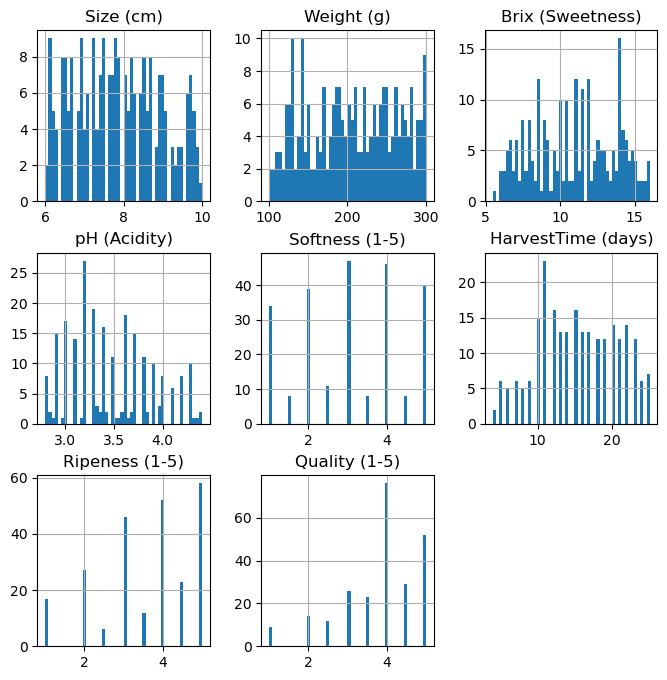

In [9]:
OrangeDF.hist(figsize=(8,8), bins=50)

In [10]:
def binary_yes_no(series):
    series = series.copy()
    for i in range(len(series)):
        if 'Y' in series[i]:
            series[i] = 1
        else:
            series[i] = 0
    return series

In [11]:
OrangeDF["Blemishes (Y/N)"] = binary_yes_no(OrangeDF["Blemishes (Y/N)"])
OrangeDF

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,1,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,1,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,1,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),1,3.0


In [12]:
OrangeDF[['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)',
          'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)', 'Blemishes (Y/N)']].corr()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5),Blemishes (Y/N)
Size (cm),1.000000,0.305348,-0.305865,0.330487,0.236863,0.313330,-0.256665,-0.243113,0.045645
Weight (g),0.305348,1.000000,-0.239659,0.303806,0.316806,0.374670,-0.260454,-0.330268,0.229955
Brix (Sweetness),-0.305865,-0.239659,1.000000,-0.300080,-0.344376,-0.329862,0.144666,0.631343,-0.052033
pH (Acidity),0.330487,0.303806,-0.300080,1.000000,0.360222,0.262461,-0.232627,-0.321942,0.286845
Softness (1-5),0.236863,0.316806,-0.344376,0.360222,1.000000,0.331103,-0.202404,-0.302732,0.064713
HarvestTime (days),0.313330,0.374670,-0.329862,0.262461,0.331103,1.000000,-0.268691,-0.474754,0.163082
Ripeness (1-5),-0.256665,-0.260454,0.144666,-0.232627,-0.202404,-0.268691,1.000000,0.280764,-0.317120
Quality (1-5),-0.243113,-0.330268,0.631343,-0.321942,-0.302732,-0.474754,0.280764,1.000000,-0.199715
Blemishes (Y/N),0.045645,0.229955,-0.052033,0.286845,0.064713,0.163082,-0.317120,-0.199715,1.000000


### Simple Multiple Linear Regression yields an R-Squared based around .50 on the numerical columns - not great.

In [19]:
X = OrangeDF[['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)',
          'HarvestTime (days)', 'Ripeness (1-5)', 'Blemishes (Y/N)']]
y = OrangeDF['Quality (1-5)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
print(mean_absolute_error(y_test, predictions))
testing = []
for i in range(len(predictions)):
    testing.append((predictions[i], y_test.to_list()[i]))

0.49749627448958217


### One-Hot Encode the remaining categorical columns (Variety & Color)

In [14]:
OrangeDF_expanded = pd.get_dummies(OrangeDF, dtype=int)
OrangeDF_expanded

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5),Color_Deep Orange,Color_Light Orange,...,Variety_Ortanique (Hybrid),Variety_Satsuma Mandarin,Variety_Star Ruby,Variety_Tangelo (Hybrid),Variety_Tangerine,Variety_Temple,Variety_Valencia,Variety_Washington Navel,Blemishes (Y/N)_0,Blemishes (Y/N)_1
0,7.5,180,12.0,3.2,2.0,10,4.0,4.0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,8.2,220,10.5,3.4,3.0,14,4.5,4.5,1,0,...,0,0,0,0,0,0,0,0,1,0
2,6.8,150,14.0,3.0,1.0,7,5.0,5.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9.0,250,8.5,3.8,4.0,21,3.5,3.5,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.5,210,11.5,3.3,2.5,12,5.0,4.5,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,5.0,0,0,...,0,0,0,0,1,0,0,0,0,1
237,7.4,275,8.5,3.5,5.0,20,5.0,4.0,0,1,...,0,0,0,0,0,0,0,0,1,0
238,7.5,196,15.7,3.0,3.0,13,3.0,5.0,1,0,...,0,0,0,0,0,1,0,0,0,1
239,7.2,251,9.8,4.3,3.0,23,1.0,3.0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [16]:
OrangeDF

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,1,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,1,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,1,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),1,3.0


### Re-running Linear Regression with all numerical / encoded columns.

In [128]:
baseline = OrangeDF["Quality (1-5)"].mean()
mean_guesses = np.full(OrangeDF.shape[0], baseline)
print("mean baseline guess r^2:", r2_score(OrangeDF["Quality (1-5)"], mean_guesses))
print("mean baseline guess MAE:", mean_absolute_error(OrangeDF["Quality (1-5)"], mean_guesses))

mean baseline guess r^2: 0.0
mean baseline guess MAE: 0.7897419121571596


In [113]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor

In [116]:
X = OrangeDF.drop(columns=['Quality (1-5)', 'Color', 'Variety'])
y = OrangeDF['Quality (1-5)']

lin_reg = LinearRegression()
lin_scores = cross_validate(estimator=lin_reg, X=X, y=y, scoring = ('r2', 'neg_mean_absolute_error'))
mlp_model = MLPRegressor(hidden_layer_sizes= 1000, activation="relu", early_stopping=True, max_iter=500)
mlp_scores = cross_validate(estimator=mlp_model, X=X, y=y, scoring = ('r2', 'neg_mean_absolute_error'))
tree_model = DecisionTreeRegressor()
tree_scores = cross_validate(estimator=tree_model, X=X, y=y, scoring = ('r2', 'neg_mean_absolute_error'))
print("Linear Regression r^2s:", lin_scores["test_r2"], "\nLinear Regression mean absolute error:", -lin_scores["test_neg_mean_absolute_error"])
print("\nMultiLayer Perceptron r^2s:", mlp_scores["test_r2"], "\nMultilayer Perceptron mean absolute error:", -mlp_scores["test_neg_mean_absolute_error"])
print("\nDecision Tree Regressor r^2s:", tree_scores["test_r2"], "\nDecision Tree Regressor mean absolute error:", -tree_scores["test_neg_mean_absolute_error"])





Linear Regression R^2s: [0.39824754 0.42717193 0.23199958 0.23614747 0.22132411] 
Linear Regression mean absolute error: [0.63176573 0.53574796 0.72742815 0.54049215 0.69251087]

MultiLayer Perceptron R^2s: [ 0.46422005 -3.85071063  0.28293974  0.10837371  0.27883939] 
Multilayer Perceptron mean absolute error: [0.61292942 1.61345447 0.72100045 0.59783008 0.69369117]

Decision Tree Regressor R^2s: [ 0.49713835  0.56811365 -0.04488442 -0.59034016 -0.21363636] 
Decision Tree Regressor mean absolute error: [0.36734694 0.32291667 0.77083333 0.69791667 0.80208333]


### Visually compare each column against 'Quality (1-5)' to check for any natural clustering

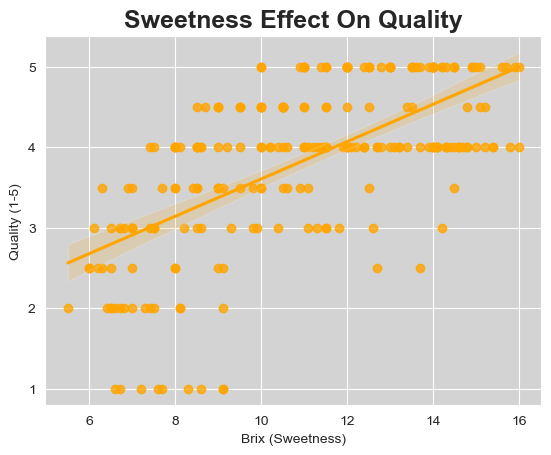

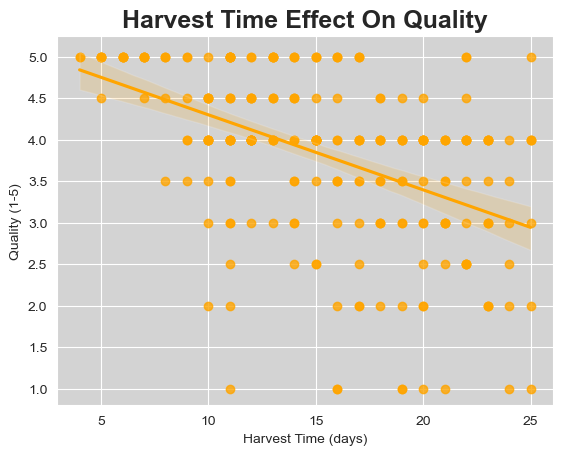

In [133]:
sns.set_style("darkgrid", rc={'axes.facecolor': 'lightgrey'})

fig, ax = plt.subplots()
sns.regplot(data=OrangeDF, x='Brix (Sweetness)', y='Quality (1-5)', color='orange', scatter=True)
ax.set_title("Sweetness Effect On Quality",size=18, weight='bold')
plt.show()

fig, ax = plt.subplots()
sns.regplot(data=OrangeDF, x='HarvestTime (days)', y='Quality (1-5)',color='orange')
ax.set_xlabel('Harvest Time (days)')
ax.set_title("Harvest Time Effect On Quality", size=18, weight='bold')
plt.show()

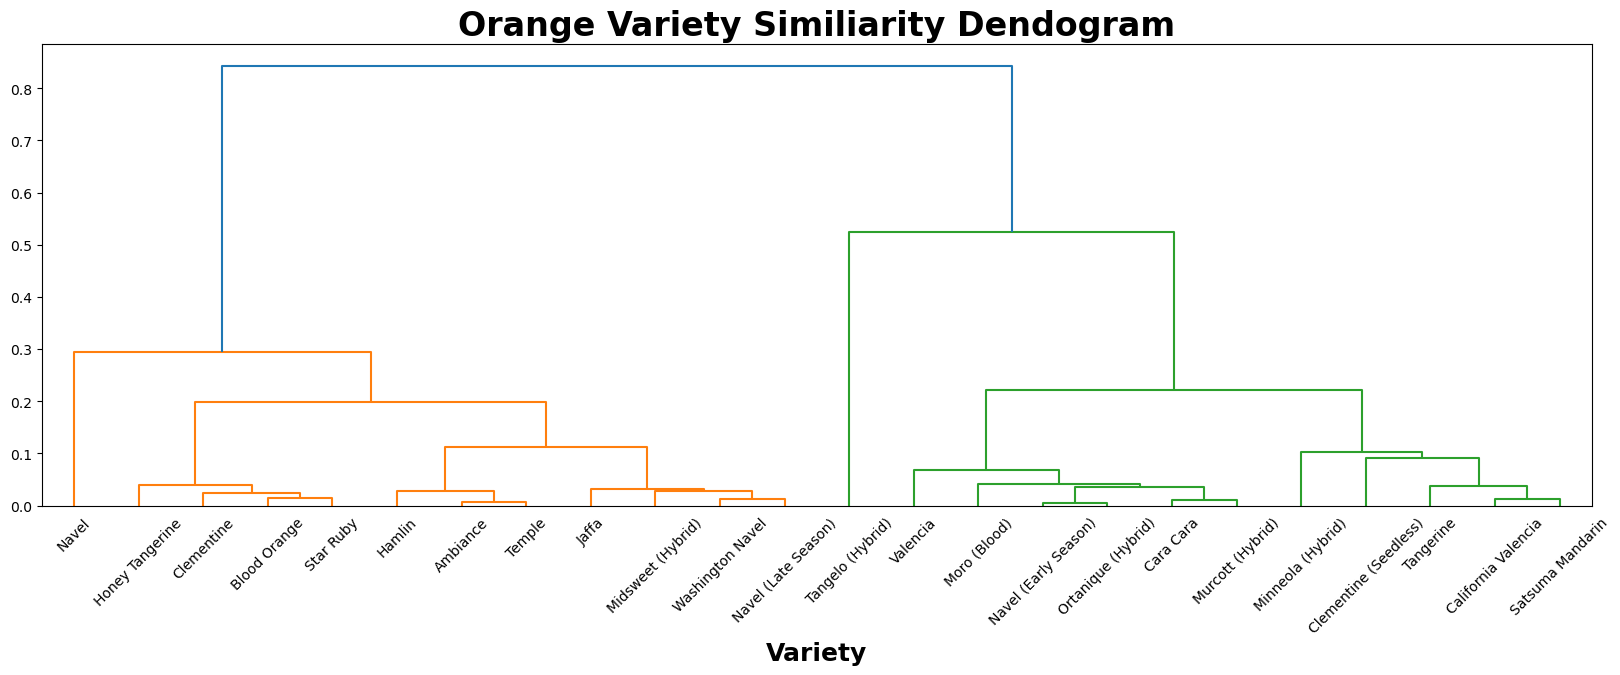

In [131]:
# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import normalize

# Load the data, save off the state names into another series and just leave the attributess
X = OrangeDF[['Brix (Sweetness)', 'HarvestTime (days)', 'pH (Acidity)','Variety']]
X = X.groupby(by='Variety').mean()[['Brix (Sweetness)', 'HarvestTime (days)', 'pH (Acidity)']]
X = normalize(X)
X.shape # (24,3)
varieties = OrangeDF['Variety'].unique() # Labels
pdist_matrix = pdist(X, metric='euclidean')

# Plot the dendrogram for the Ward proximity measure
ward_dendogram=linkage(pdist_matrix, method='ward', metric='euclidean', optimal_ordering=False) # Create the clustering model
fig = plt.figure(figsize=(20, 6))
dn = dendrogram(ward_dendogram, labels=np.array(varieties)) # Create the dendogram based off of the model
plt.xlabel("Variety", size=18, weight='bold')
plt.title("Orange Variety Similiarity Dendogram", size=24, weight='bold')
plt.show()